## ML Assignment 5 - CLUSTERING TECHNIQUES

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [2]:
# Set random seed for reproducibility
np.random.seed(42)


### 1. Loading and Preprocessing


In [3]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print("First 5 rows of the Iris dataset:")
print(iris_df.head())

First 5 rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
# Standardize the data (important for clustering algorithms)
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)


### 2. Clustering Algorithm Implementation


#### A) KMeans Clustering

#### KMeans Clustering Description:
KMeans is a centroid-based clustering algorithm that partitions the data into K clusters.
It works by:
1. Randomly initializing K centroids
2. Assigning each data point to the nearest centroid
3. Recalculating the centroids as the mean of all points in the cluster
4. Repeating steps 2-3 until convergence (centroids stop moving significantly)

KMeans is suitable for the Iris dataset because:
- The dataset has clearly separated groups (as we know from the labels)
- The features are all numerical and on similar scales (after standardization)
- The number of clusters (3) is relatively small and known

In [5]:
# Determine optimal number of clusters using the Elbow method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(iris_scaled)
    wcss.append(kmeans.inertia_)


C:\Users\DILEEP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DILEEP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DILEEP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DILEEP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

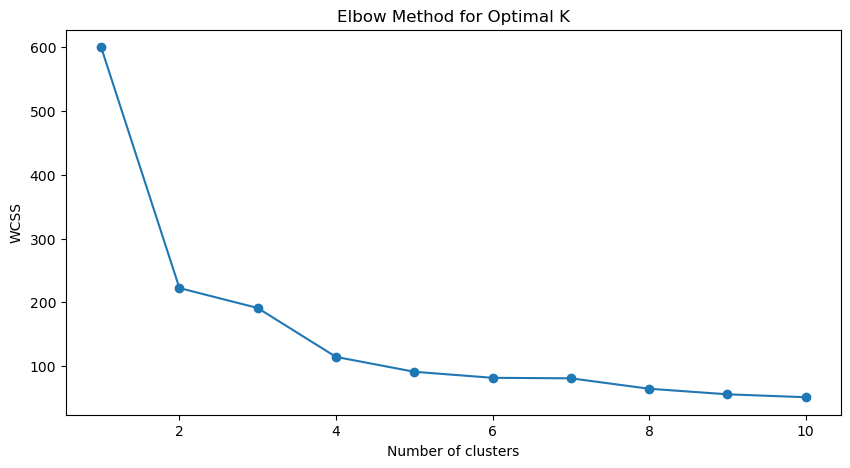

In [6]:
# Plot the Elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [7]:
# Apply KMeans with K=3 (we know there are 3 species in Iris)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(iris_scaled)
iris_df['KMeans_Cluster'] = kmeans.labels_

C:\Users\DILEEP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


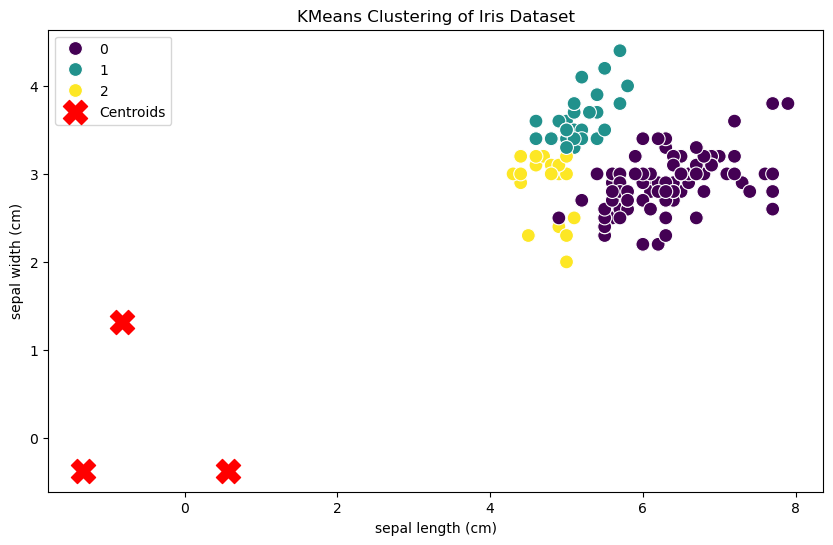

In [8]:
# Visualize the clusters (using first two features for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', 
                hue='KMeans_Cluster', data=iris_df, 
                palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering of Iris Dataset')
plt.legend()
plt.show()

#### B) Hierarchical Clustering


#### Hierarchical Clustering Description:
Hierarchical clustering builds a hierarchy of clusters either through:
- Agglomerative (bottom-up) approach: Each point starts as its own cluster, and clusters are merged
- Divisive (top-down) approach: All points start in one cluster, which is recursively split

We typically use agglomerative clustering which works by:
1. Treating each data point as its own cluster
2. Finding the two closest clusters and merging them
3. Repeating step 2 until all points are in one cluster
4. Creating a dendrogram to determine the optimal number of clusters

Hierarchical clustering is suitable for the Iris dataset because:
- It provides a dendrogram that can help visualize the natural groupings
- It doesn't require specifying the number of clusters upfront
- It can reveal hierarchical relationships between clusters



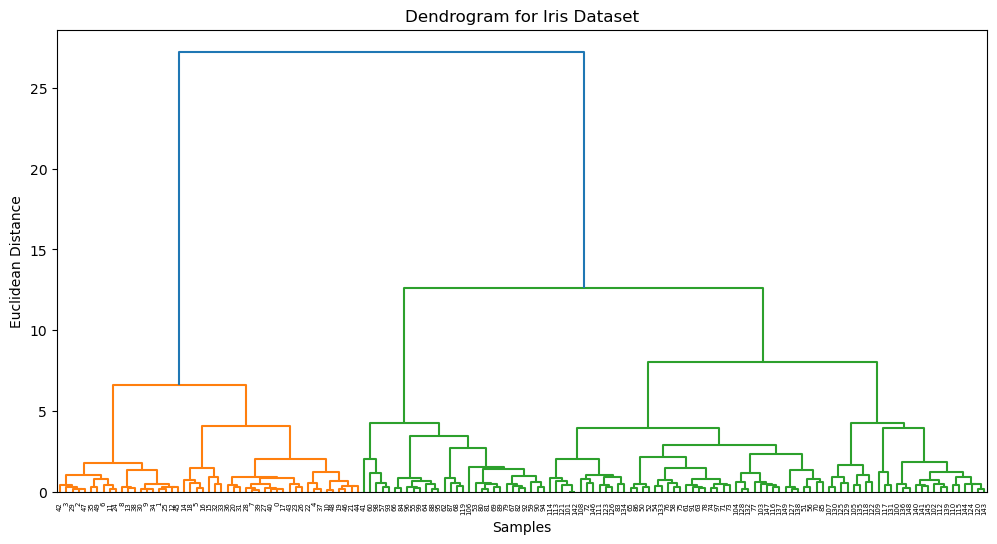

In [9]:
# Create a dendrogram to determine the number of clusters
plt.figure(figsize=(12, 6))
dendrogram_obj = dendrogram(linkage(iris_scaled, method='ward'))
plt.title('Dendrogram for Iris Dataset')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

In [10]:
# Apply Agglomerative Clustering with n_clusters=3
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
iris_df['Hierarchical_Cluster'] = hierarchical.fit_predict(iris_scaled)


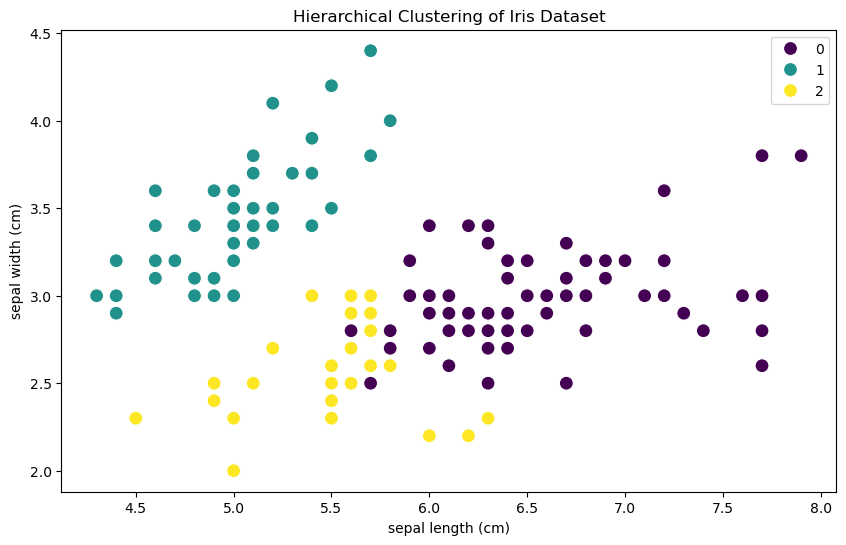

In [11]:
# Visualize the hierarchical clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', 
                hue='Hierarchical_Cluster', data=iris_df, 
                palette='viridis', s=100)
plt.title('Hierarchical Clustering of Iris Dataset')
plt.legend()
plt.show()


In [12]:
# Compare the two clustering results
print("\nCluster distribution comparison:")
print("KMeans Clusters:")
print(iris_df['KMeans_Cluster'].value_counts())
print("\nHierarchical Clusters:")
print(iris_df['Hierarchical_Cluster'].value_counts())


Cluster distribution comparison:
KMeans Clusters:
KMeans_Cluster
0    96
1    33
2    21
Name: count, dtype: int64

Hierarchical Clusters:
Hierarchical_Cluster
0    71
1    49
2    30
Name: count, dtype: int64


### Explanation of Key Components:
#### Loading and Preprocessing:

The Iris dataset is loaded from sklearn.datasets

We create a DataFrame with only the features (species/target column is excluded)

The data is standardized (important for distance-based algorithms)

#### KMeans Clustering:

We use the Elbow method to determine the optimal number of clusters

KMeans is applied with K=3 and the results are visualized

Cluster centroids are marked on the visualization

#### Hierarchical Clustering:

A dendrogram is created to visualize the hierarchical relationships

Agglomerative clustering is applied with 3 clusters

Results are visualized and compared with KMeans results

The visualizations help show how the different algorithms partition the data space, and the cluster counts show how similar/different the two methods are in grouping the Iris data points.
